<a href="https://colab.research.google.com/github/anujthapamagar/FEDS/blob/main/windrose_dewpoint_windchill10April.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# windrose, dew point and wind chill

### Aims of the lecture:
* Work with meteorological data
* Create windroses
* Calculate dew point
* Calculate wind chill

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
pip install windrose

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
from windrose import WindroseAxes
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

In [6]:
# create time series of wind velocity and wind direction
# ws: wind speed
# wd: wind direction

ws = np.array([5,5,10,10]) # m/s
wd = np.array([0,0,90,90]) # angle in degrees

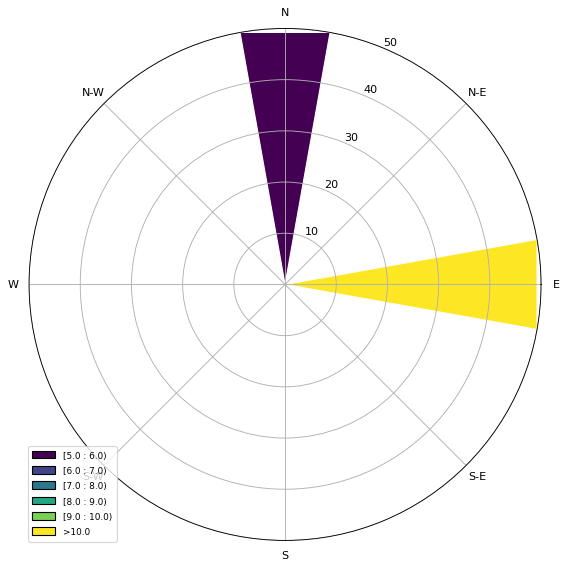

In [9]:
ax = WindroseAxes.from_ax(theta_labels=['E','N-E','N','N-W','W','S-W', 'S','S-E'])
ax.bar(wd,ws, normed=True, opening=0.9,edgecolor='white')
ax.set_legend();

In [10]:
ws2 = np.array([5,7,8,10]) # m/s
wd2 = np.array([270,180,180,180]) # angle in degrees

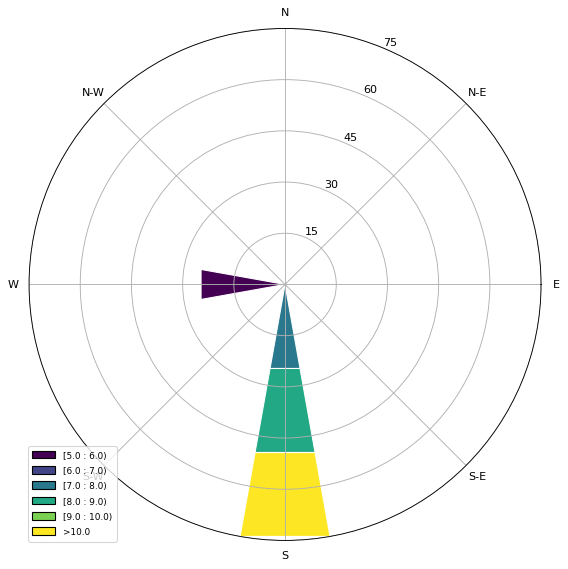

In [11]:
ax = WindroseAxes.from_ax(theta_labels=['E','N-E','N','N-W','W','S-W', 'S','S-E'])
ax.bar(wd2,ws2, normed=True, opening=0.9,edgecolor='white')
ax.set_legend();

# Generate random numbers from zero [0,1.0]
* `np.random.random()`
* `np.random.vonmises()`


In [13]:
np.random.random(1)

array([0.19677441])

In [14]:
ws = np.random.random(3000)*6
wd = np.random.random(3000)*360

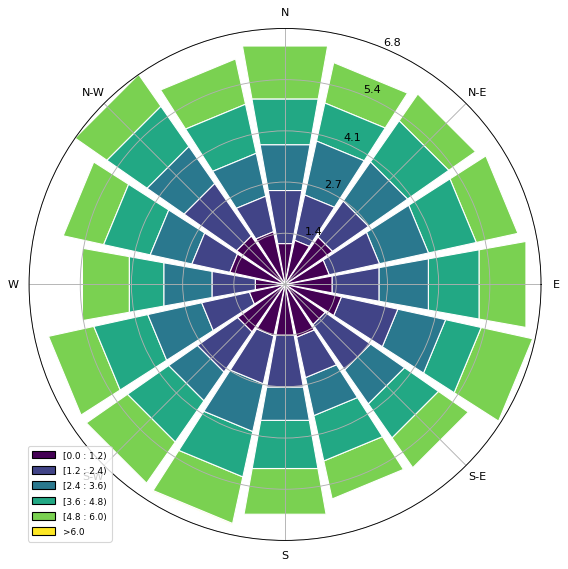

In [15]:
ax = WindroseAxes.from_ax(theta_labels=['E','N-E','N','N-W','W','S-W', 'S','S-E'])
ax.bar(wd,ws, normed=True, opening=0.9,edgecolor='white')
ax.set_legend();

In [16]:
ws = np.random.vonmises(0,3.14,3000)*6
wd = np.random.vonmises(0,3.14,3000)*360

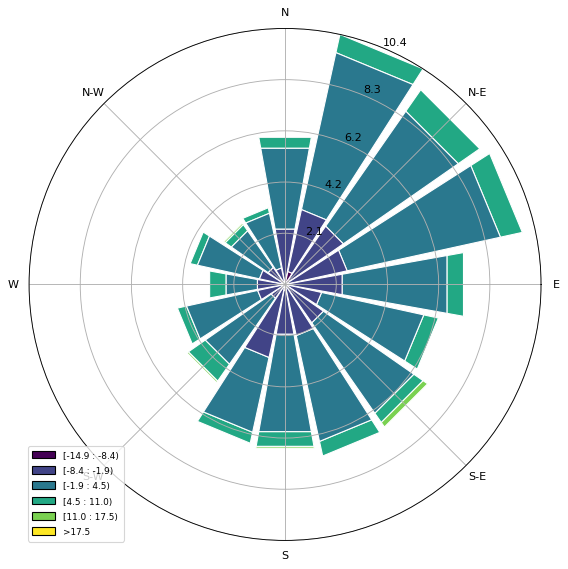

In [17]:
ax = WindroseAxes.from_ax(theta_labels=['E','N-E','N','N-W','W','S-W', 'S','S-E'])
ax.bar(wd,ws, normed=True, opening=0.9,edgecolor='white')
ax.set_legend();

In [22]:
# data from Brazil
! gdown --id 1_MG88ST4Ylji8bwlE0pobT--HIYQRLDe ## download from google drive id

/usr/local/lib/python3.9/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1_MG88ST4Ylji8bwlE0pobT--HIYQRLDe
To: /content/meteo.csv
100% 486k/486k [00:00<00:00, 111MB/s]


In [24]:
data = pd.read_csv("meteo.csv",sep=';')
data.head(3)

,NO.,Time,Interval,Indoor Temperature(oC),Indoor Humidity(%),Outdoor Temperature(oC),Outdoor Humidity(%),Relative Pressure(hpa),Absolute Pressure(hpa),Wind Speed(m/s),Gust(m/s),Wind Direction,DewPoint(oC),WindChill(oC),Hour Rainfall(mm),24 Hour Rainfall(mm),Week Rainfall(mm),Month Rainfall(mm),Total Rainfall(mm)
0,1,22/11/2018 23:17:47,5,22.7,72,20.3,87,1009.6,905.6,4.1,5.8,SE,18.1,17.7,0.0,0.0,0.0,0.0,0.0
1,2,22/11/2018 23:22:47,5,22.6,73,20.3,87,1009.6,905.6,3.1,4.1,SE,18.1,18.5,0.0,0.0,0.0,0.0,0.0
2,3,22/11/2018 23:27:47,5,22.5,73,20.3,88,1009.6,905.6,2.7,5.1,E,18.3,18.9,0.0,0.0,0.0,0.0,0.0


In [25]:
ws = data['Wind Speed(m/s)'].values
print(len(ws))

4120


In [26]:
data[-3:-1]

,NO.,Time,Interval,Indoor Temperature(oC),Indoor Humidity(%),Outdoor Temperature(oC),Outdoor Humidity(%),Relative Pressure(hpa),Absolute Pressure(hpa),Wind Speed(m/s),Gust(m/s),Wind Direction,DewPoint(oC),WindChill(oC),Hour Rainfall(mm),24 Hour Rainfall(mm),Week Rainfall(mm),Month Rainfall(mm),Total Rainfall(mm)
4117,4118,07/12/2018 06:58:47,5,20.2,67,15.8,91,1011.1,907.1,2.4,3.1,SE,14.4,14.3,0.0,0.0,0.0,0.3,40.5
4118,4119,07/12/2018 07:03:47,5,20.0,68,15.6,92,1011.0,907.0,2.4,2.7,S,14.3,14.1,0.0,0.0,0.0,0.3,40.5


In [30]:
wd = data['Wind Direction']
wd.head(3)

0     SE
1     SE
2      E
Name: Wind Direction, dtype: object

In [33]:
wd_graus = wd.copy()

In [34]:
wd_graus.unique()

array([' SE', ' E', ' N', ' ENE', ' NE', ' NNE', ' S', ' NNW', ' W',
       ' WSW', ' ESE', ' NW', ' WNW', ' SW', ' ---', ' SSW', ' SSE'],
      dtype=object)

In [36]:
wd_graus = wd_graus.replace({' N'  :  0})
wd_graus = wd_graus.replace({' NE':  45})
wd_graus = wd_graus.replace({' E'  : 90})
wd_graus = wd_graus.replace({' SE': 135})
wd_graus = wd_graus.replace({' S' : 180})
wd_graus = wd_graus.replace({' SW': 225})
wd_graus = wd_graus.replace({' W' : 270})
wd_graus = wd_graus.replace({' NW': 315})

wd_graus = wd_graus.replace({' ENE'  :  67.5})
wd_graus = wd_graus.replace({' NNE'  :  22.5})
wd_graus = wd_graus.replace({' NNW'  :  337.5})
wd_graus = wd_graus.replace({' WSW'  :  247.5})
wd_graus = wd_graus.replace({' ESE'  :  112.5})
wd_graus = wd_graus.replace({' WNW'  :  292.5})
wd_graus = wd_graus.replace({' SSW'  :  202.5})
wd_graus = wd_graus.replace({' SSE'  :  157.5})


In [37]:
wd_graus = wd_graus.replace({' ---': np.nan})

In [38]:
wd_graus.unique()

array([135. ,  90. ,   0. ,  67.5,  45. ,  22.5, 180. , 337.5, 270. ,
       247.5, 112.5, 315. , 292.5, 225. ,   nan, 202.5, 157.5])

In [40]:
new_df = pd.DataFrame({'ws (m/s)': ws, 'wd (degrees)': wd_graus})
new_df.head(2)

,ws (m/s),wd (degrees)
0,4.1,135.0
1,3.1,135.0


In [41]:
df = new_df.dropna()

In [42]:
print(len(new_df), len(df))

4120 4116


In [43]:
ws = df['ws (m/s)'].values
wd = df['wd (degrees)'].values

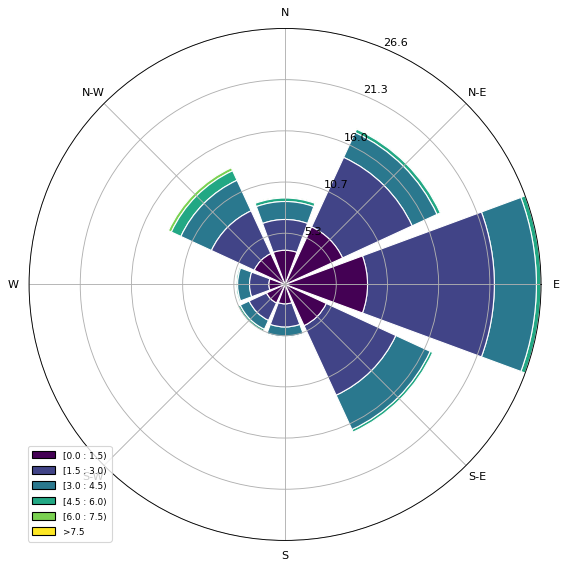

In [48]:
ax = WindroseAxes.from_ax(theta_labels=['E','N-E','N','N-W','W','S-W', 'S','S-E'])
ax.bar(wd,ws,nsector=8, normed=True, opening=0.9,edgecolor='white')
ax.set_legend();

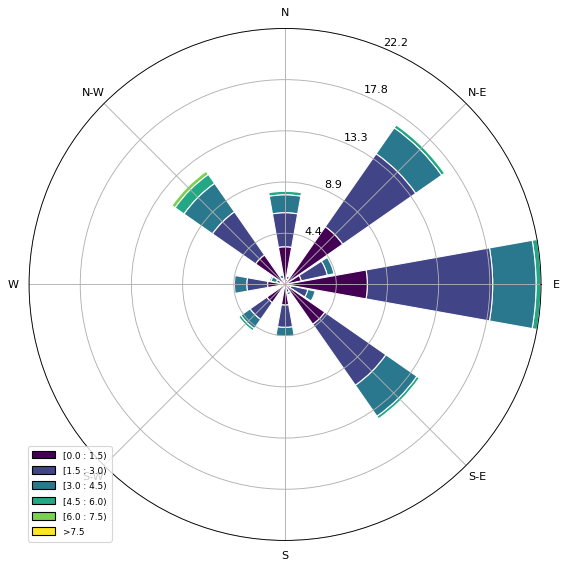

In [52]:
# changing number of sectors
ax = WindroseAxes.from_ax(theta_labels=['E','N-E','N','N-W','W','S-W', 'S','S-E'])
ax.bar(wd,ws,nsector=16, normed=True, opening=0.9,edgecolor='white')
ax.set_legend();

# Calculating dew point temperature
$
T_{dp} \approx T -\frac{100-\text{RH}}{5}
$

In [53]:
T = data['Outdoor Temperature(oC)'].values
RH = data['Outdoor Humidity(%)'].values

In [54]:
TDP = T - (100-RH)/5
TDP

array([17.7, 17.7, 17.9, ..., 14. , 14. , 14.1])

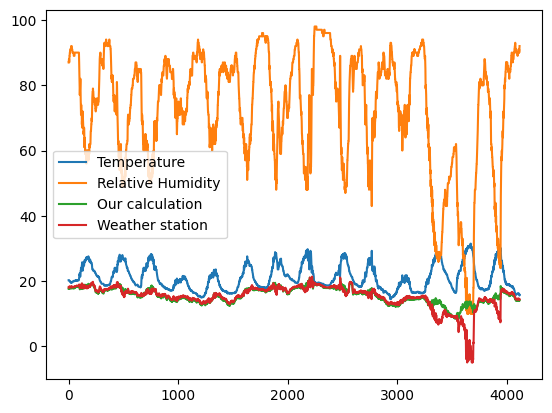

In [59]:
plt.plot(data['Outdoor Temperature(oC)'], label = 'Temperature')
plt.plot(data['Outdoor Humidity(%)'], label = 'Relative Humidity')
plt.plot(TDP, label = 'Our calculation')
plt.plot(data['DewPoint(oC)'], label = 'Weather station')
plt.legend();

# Calculate wind chill 


In [60]:
ws = data['Wind Speed(m/s)'].values
T = data['Outdoor Temperature(oC)'].values

In [61]:
TWC = 13.12+0.6215*T-11.37*ws**(0.16)+0.3965*ws**(0.16)

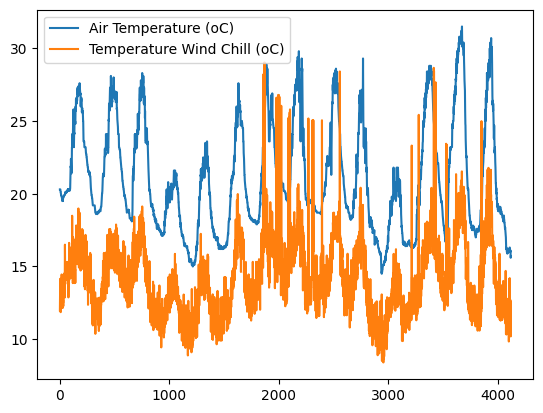

In [62]:
plt.plot(T, label = 'Air Temperature (oC)')
plt.plot(TWC, label = 'Temperature Wind Chill (oC)')
plt.legend();